In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Deterministic Time Series Models I


Time series models are at the foundatation of dynamic macroeconomic theory. A time series model is an equation or system of equations that describes how the variables in the model change with time. Here, we examine some theory about **deterministic**, i.e., non-random, time series models and we explore methods for simulating them. Later, we'll examine the properties of **stochastic** time series models by introducing random variables to the discrete time models covered below.


## Discrete Versus Continuous Time


To begin, suppose that we are interested in a variable $y$ that takes on the value $y_t$ at date $t$. The date index $t$ is a real number. We'll say that $y_t$ is a **discrete time** variable if $t$ takes on values from a countable sequence; e.g. $t = 1, 2, 3 \ldots$ and so on. Otherwise, if $t$ takes on values from an uncountable sequence; e.g. $t\in \mathbb{R}^+$, then we'll say that $y_t$ is a **continuous time** variable. Discrete and continuous time models both have important places in macroeconomic theory, but we're going to focus on understanding discrete time models.


## First-Order Difference Equations


Now, suppose that the variable $y_t$ is determined by a linear function of $y_{t-1}$ and some other exogenously given variable $w_t$

\begin{align}
    y_{t} & =  \rho y_{t-1} + w_t,  \tag{1}\\
\end{align}

where $\rho$ is a constant. Equation (1) is an example of a **linear first-order difference equation**. As a *difference equation*, it specifies how $y_t$ is related to past values of $y$. The equation is a *first-order* difference equation because it specifies $y_t$ as a function only of $y_{t-1}$ and not $y_{t-2}$ or $y_{t-3}$ and so on. As simple as the equation looks, it's used in a wide range of modeling applications.


### Example: Compounding Interest

Suppose that you have an initial balance of $b_0$ dollars in a savings account that pays an interest rate $i$ per compounding period. Then, after the first compounding, your account will have $b_1 = (1+i)b_0$ dollars in it. Assuming that you never withdraw funds from the account, then your account balance in any subsequent period $t$ is given by the following difference equation:

\begin{align}
b_{t} & =  \left(1+i\right) b_{t-1}. \tag{2}
\end{align}

Equation (2) is linear first-order difference equation in the same form as Equation (1). You can see this by setting $y_t = b_t$, $\rho=1+i$, and $w_t=0$ in Equation (1).
   
### Example: Capital Accumulation

Let $K_t$ denote the amount of physical capital in a country at date $t$, let $\delta$ denote the rate at which the capital stock depreciates each period, and let $I_t$ denote the country's investment in new capital in date $t$. Then the law of motion for the stock of physical capital is:

\begin{align}
K_{t+1} & =  I_t + (1-\delta)K_t. \tag{3}
\end{align}
       
This standard expression for the law of motion for the capital stock is a linear first-order difference equation. To reconcile Equation (3) with Equation (1), set $y_t = K_{t+1}$, $\rho=1-\delta$, and $w_t=I_t$. 

*Note*: There is a potentially confusing way in which we identified the $t+1$-dated variable $K_{t+1}$ with the $t$-dated variable $y_t$ in this example. We can do this because the value of $K_{t+1}$ truly is determined at date $t$ even though the capital isn't used for production until the next period.

## Computation

From Equation (1), it's easy to compute the value of $y_t$ as long as you know the value of the constant $\rho$ and the variables $y_{t-1}$ and $w_t$. To begin, let's suppose that $\rho=0.5$. Then Equation (1) in our example looks like this:

\begin{align}
y_{t} & =  0.5 y_{t-1} + w_t. \tag{4}\\
\end{align}

Now, suppose that the initial value of $y$ is $y_0=0$ and that $w$ is equal to 1 in the first period and equal to zero in subsequent periods. That is: $w_1=1$ and $w_2=w_3=\cdots =0$. Now, with what we have, we can compute $y_1$. Here's how:

In [2]:
# Initialize values for rho y0, and w1
y0 = 0
rho = 0.5
w1 = 1

# Compute the value of y1
y1 = rho*y0 + w1

# Print the value of y1
print('y1 =',y1)

y1 = 1.0


The variable `y1` in the preceding example stores the computed value for $y_1$. We can continue to *iterate* on Equation (4) to compute $y_2$, $y_3$, and so on. For example:

In [3]:
# Initialize value for rw2
w2=0

# Compute the value of y2
y2 = rho*y1 + w2

# Compute the value of y2
# Print the result
print('y2 =',y2)

y2 = 0.5


We can do this as many times as necessary to reach the desired value of $t$. Note that iteration is necesary. There is no *vectorized* way to compute an array of values $\left[y_1, y_2, y_3, \ldots, y_{T}\right]$  simultaneously. The linear first-order difference equation is an example of a *recursive* model and in general iteration is necessary for computing recursive models.

Of course, there are smart ways to write code to simulate models. Rather than creating a bunch of variables `y1`, `y2`, etc., let's define a function called `diff1_example()`that takes as arguments $\rho$, $y_0$m and an array of values for $w$, and returns an array of simulated $y$ values . The function should:

1. Definie a variable named `T` equal to the length of  `w`
2. Define an array of of length called `y` that is filled with zeros
3. Set the first vale of `y` to $y_0$
4. Fill-in the remaining values of `y` by iterating over:
        y[t+1]=rho*y[t]+w[t+1]
   for `t` in $[0,1,\ldots, T-1]$
5. Return `y`

In [4]:
# Define a function that returns an array of y-values given rho, y0, and an array of w values.
def diff1_example(rho,w,y0):
    '''Function for computing the first-order difference equation y[t] = rho*y[t-1] + w[t]
    
    Args:
        rho (float):                Autoregressive coefficient on y[t-1]
        w (NumPy ndarray or list):  Array of exogenous values
        y0 (float):                 Initial value of the process
     
     Returns:
         NumPy ndarray
     '''

    T = len(w)
    y = np.zeros(T)
    y[0] = y0

    for t in range(T-1):
        y[t+1]=rho*y[t]+w[t+1]

    return y

### Example: Temporary Shock to $w_t$ with $\rho=0.5$

Now, use the function `diff1_example()` to simulate $y$ for 11 periods (i.e., for $t = 0, 1, \ldots 10$ with
1. $\rho=0.5$
2. $w_1 = 1$ and $w_0 = w_2 = \ldots = w_{10} = 0$ 
3. $y_0 = 0$

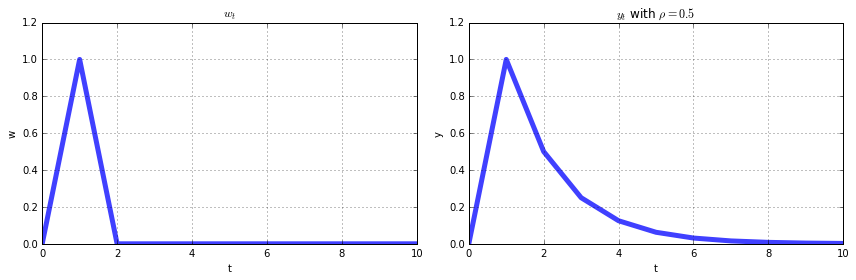

In [5]:
# Initialize the variable 'T' to be equal to the number of periods to simulate
T = 11

# Create new variable 'rho' equal to the value for rho
rho = 0.5

# Create new variable 'y' equal to the initial value for y
y0 = 0

# Initialize variable 'w' and set initial value
w = np.zeros(T)
w[1]=1

# Simulate y
y = diff1_example(rho,w,y0)

# Construct figure with two line graphs plotting the trajectories of y and w with:
#    1. Plot for w in left panel and plot for y in right panel
#    2. Clear title, x-, and y-axis labels
#    3. y-axis limits [0,1.2]

# Create figure
fig = plt.figure(figsize=(12,4))

# w trajectory
ax = fig.add_subplot(1,2,1)
ax.plot(w,'-',lw=5,alpha = 0.75)
ax.set_title('$w_t$')
ax.set_ylabel('w')
ax.set_xlabel('t')
ax.set_ylim([0,1.2])
ax.grid()

# y trajectory
ax = fig.add_subplot(1,2,2)
ax.plot(y,'-',lw=5,alpha = 0.75)
ax.set_title('$y_t$ with $\\rho=0.5$')
ax.set_ylabel('y')
ax.set_xlabel('t')
ax.set_ylim([0,1.2])
ax.grid()

# Use fig.tight_layout() to manage whitespace in the figure
fig.tight_layout()

In period 1, the *shock* to $w_t$ creates an exogenous increase in the process $y_t$. Since $y_{t+1}$ depends on the value of $y_{t}$, the transient or temporary shock to $w_t$ has a persistent effect on the series $y_t$. We call plots like those in the previous figure **impulse responses** because they depict the *responses* of variables to a one-time shock or *impulse* in the exogenous variable.

### Example: Temporary Shock to $w_t$ for Different Values of $\rho$

Next, use the function `diff1_example()` to simulate $y$ for 11 periods with:
1. $\rho=0.2, 0.4, 0.8, 0.1$
2. $w_1 = 1$ and $w_0 = w_2 = \ldots = w_{10} = 0$ 
3. $y_0 = 0$

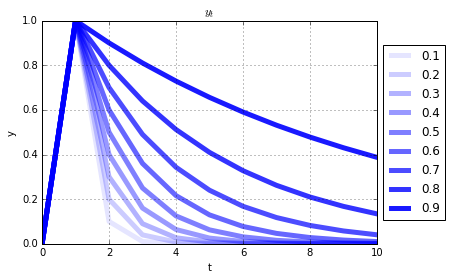

In [6]:
# Note: Since T, w, and y0 are already defined, there's no need to re-define them

# Construct a line graph plotting the trajectories of y with:
#    1. Clear title, x-, and y-axis labels
#    2. Y-axis limits [0,1.2]
#    3. Add a legend outside of the plot with arguments: loc='center left', bbox_to_anchor=(1, 0.5)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Iterate over rho in [0.1, 0.2, 0.3, ... , 0.9]. Simulate y for each rho and plot. Set plot label equal to rho value
for rho in np.arange(0.1,1,0.1):
    y = diff1_example(rho,w,y0)
    plt.plot(y,'-b',lw=5,alpha = rho,label=round(rho,1))
    
ax.set_title('$y_t$')
plt.ylabel('y')
plt.xlabel('t')
# ax.set_ylim([0,1.2])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid()

Apparently increasing $\rho$ also increases the degree of persistence in the process $y$ following the shock to $w$. By $t=10$, the effects of the one-time increase in $w$ on $y$ have essentially dissipated for the simulations with $\rho= 0.1, 0.2, \ldots, 0.7$. But for $\rho=0.8$, the value of the $y$ is still above $0.15$ in period $10$ and for $\rho=0.9$, the process $y$ is nearly at $0.4$; i.e., nearly $40$ percent of the shock still remains. But regardless, in all cases it appears that $y$ approaches zero in the limit.

### Example: Temporary Shock to $w_t$ for $\rho=-0.5$

Use the function `diff1_example()` to simulate $y$ for 11 periods with:
1. $\rho=-0.5$
2. $w_1 = 1$ and $w_0 = w_2 = \ldots = w_{10} = 0$ 
3. $y_0 = 0$

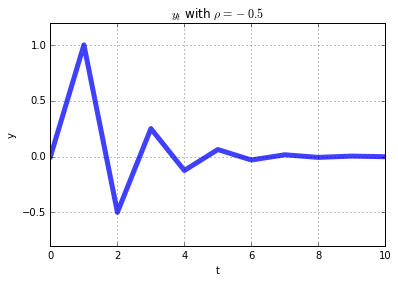

In [7]:
# Note: Since T, w, and y0 are already defined, there's no need to re-define them

# Create new variable 'rho' equal to the value for rho
rho = -0.5

# Simulate y
y = diff1_example(rho,w,y0)

# Construct a line graph plotting the trajectory of y with:
#    1. Plot for y stacked on top of plot for w
#    2. Clear title, x-, and y-axis labels
#    3. Y-axis limits [-0.8,1.2]

# Create figure
fig = plt.figure()

# y trajectory
ax = fig.add_subplot(1,1,1)
ax.plot(y,'-',lw=5,alpha = 0.75)
ax.set_title('$y_t$ with $\\rho=-0.5$')
ax.set_ylabel('y')
ax.set_xlabel('t')
ax.set_ylim([-0.8,1.2])
ax.grid()

With $\rho=-0.5$, the sign of the pricess $y$ oscilates between positive and negative values but the absolute value of $y$ smoothly converges to zero in the limit.

### Example: Temporary Shock to $w_t$ for $\rho=1.5$ and $\rho=-1.5$

So far all of the values that we hav used for $\rho$ have been less than 1 in absolute value and in all cases, the process $y$ has returned to zero in the limit. But this may not always be the case. Let's consider the cases where $\rho=1.5$ and $\rho=-1.5$.

Use the function `diff1_example()` to simulate $y$ for 11 periods with:
1. $\rho=1.5$ (left panel) and $\rho=-1.5$ (right panel)
2. $w_1 = 1$ and $w_0 = w_2 = \ldots = w_{10} = 0$ 
3. $y_0 = 0$

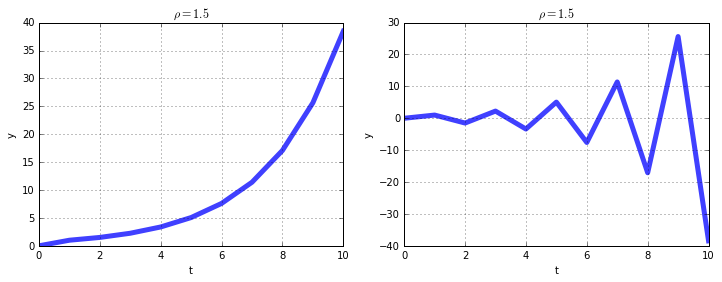

In [8]:
# Note: Since T, w, and y0 are already defined, there's no need to re-define them

# Create figure
fig = plt.figure(figsize=(12,4))

# Set rho=1.5
rho = 1.5

# Simulate y with rho = 1.5
y = diff1_example(rho,w,0)

# plot trajectory of y with rho = 1.5
ax = fig.add_subplot(1,2,1)

ax.plot(y,'-',lw=5,alpha = 0.75)
ax.set_title('$\\rho=1.5$')
ax.set_ylabel('y')
ax.set_xlabel('t')
ax.grid()

# Set rho=-1.5
rho = -1.5

# Simulate y with rho = -1.5
y = diff1_example(rho,w,0)

# plot trajectory of y with rho = -1.5
ax = fig.add_subplot(1,2,2)

ax.plot(y,'-',lw=5,alpha = 0.75)
ax.set_title('$\\rho=1.5$')
ax.set_ylabel('y')
ax.set_xlabel('t')
ax.grid()

Unlike the earlier simulations, the ones in the previous example do not return to zero and instead either explode toward infinity ($\rho = 1.5$) or oscillate towards positive and negative infinity. These two simulations are examples of *explosive processes* while the ones prior were examples of *stable processes*. In the next section, I elaborate on the notion of stability.



### Example: Permanent Shock to $w_t$ with $\rho=0.5$

So far we hav eonly considered temporary shocks to to $wt$. But sometimes we want to know what effect does a permanent change in $w_t$ have on $y_t$. To answer this, we set $w_0=0$ and $w_1 = w_2 = \cdots = 1$.

Now, use the function `diff1_example()` to simulate $y$ for 11 periods (i.e., for $t = 0, 1, \ldots 10$ with
1. $\rho=0.5$
2. $w_1 = 0$ and $w_1 = w_2 = \ldots = w_{10} = 1$ 
3. $y_0 = 0$

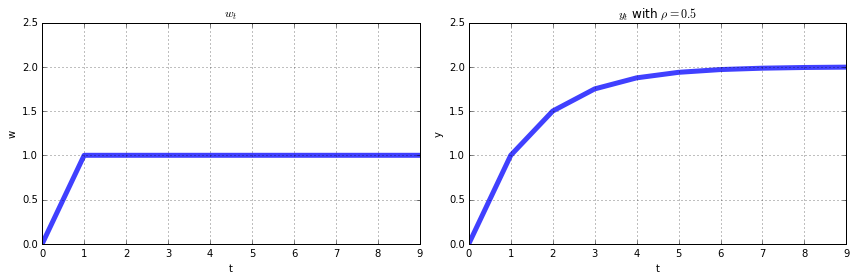

In [9]:
# Initialize the variable 'T' to be equal to the number of periods to simulate
T = 11

# Create new variable 'rho' equal to the value for rho
rho = 0.5

# Create new variable 'y' equal to the initial value for y
y0 = 0

# Initialize variable 'w' as arrays of ones
w = np.ones(T-1)
w[0] = 0

# Simulate y
y = diff1_example(rho,w,y0)

# Construct figure with two line graphs plotting the trajectories of y and w with:
#    1. Plot for w in left panel and plot for y in right panel
#    2. Clear title, x-, and y-axis labels
#    3. y-axis limits [0,2.5]

# Create figure
fig = plt.figure(figsize=(12,4))

# w trajectory
ax = fig.add_subplot(1,2,1)
ax.plot(w,'-',lw=5,alpha = 0.75)
ax.set_title('$w_t$')
ax.set_ylabel('w')
ax.set_xlabel('t')
ax.set_ylim([0,2.5])
ax.grid()

# y trajectory
ax = fig.add_subplot(1,2,2)
ax.plot(y,'-',lw=5,alpha = 0.75)
ax.set_title('$y_t$ with $\\rho=0.5$')
ax.set_ylabel('y')
ax.set_xlabel('t')
ax.set_ylim([0,2.5])
ax.grid()

# Use fig.tight_layout() to manage whitespace in the figure
fig.tight_layout()

The cumulative effect on $y$ in period $T$ of the permanent change in $w_t$ is:

\begin{align}
y_T & = \rho^{T-1} + \rho^{T-2} + \rho^{T-3} + \cdots + \rho + 1\\
& = \frac{1}{1-\rho},
\end{align}

which, for the example above, is $2$ and that is confirmed by the simulation.

## Stability of First-Order Difference Equations

You might already see that the value of $\rho$ is important in determining the stability of the process $y$, but we can see clearly why. Suppose that $\mu=0$ (this just makes the argument more clear) and start with the equation for determining $y_1$:

\begin{align}
y_1 & = \rho y_0 + w_1
\end{align}

The value for $y_2$ is determined by an analogous equation:

\begin{align}
y_2 & = \rho y_1 + w_2
\end{align}

Then use the equation for $y_1$ to eliminate $y_1$ from the equation for $y_2$:

\begin{align}
y_2 & = \rho^2 y_0 + \rho w_1 + w_2
\end{align}

Continue this process to arrive at a formula that specifies the value of $y$ in period $T$ as a function of just $\rho$, $y_0$, and the values of $w$: $w_1, w_2, \ldots, w_T$:

\begin{align}
y_T & = \rho^T y_0 + \rho^{T-1} w_1 + \rho^{T-2} w_2 + \cdots + \rho w_{T-1} + w_T\\
\end{align}

Then, you can see that the marginal effect of $w_1$ on $y_T$ is:

\begin{align}
\frac{\partial y_T}{\partial w_1} & = \rho^{T-1}
\end{align}

From this, there are three facts:

1. If $|\rho|<1$, then the process $y$ is **stable** because $|\rho^{T-1}|\rightarrow 0$ as $T\rightarrow \infty$.
2. If $|\rho|>1$, then the process $y$ is **explosive** because $|\rho^{T-1}|\rightarrow \infty$ as $T\rightarrow \infty$.
2. If $|\rho|=1$, then the process $y$ is neither stable nor explosive because $|\rho^{T-1}|\rightarrow 1$ as $T\rightarrow \infty$.

The final case, with $|\rho^T|=1$, is closely related to the *random walk* stochastic process that is often used to describe finacial asset returns over short time horizons. We will encounter this process later.

Stability is a fundamental concept in economics and there are important roles for models with stable and explosive properties.

## Higher-order Difference Equations (Optional)

The $p$th-order linear difference equation is given by the following expression:

\begin{align}
y_t & = \rho_1 y_{t-1} + \rho_2 y_{t-2} + \cdots + \rho_p y_{t-p} + w_t,
\end{align}

where $\rho_1, \rho_2, \ldots, \rho_p$ are constants. In principle, computing the $p$th-order difference equation is the same as computing the first-order difference equation. The only difference real difference is that you need $p$ initial values of $y$ and not just 1. That is, in order to compute the period 1 value $y_1$, you need values for $y_0, y_{-1}, \ldots, y_{-(p-1)}$.

The function in the following cell simulates $p$-order difference equations so we can use it for the examples below.

In [10]:
# Define a function that returns a DataFrame of y and w values given coefficients, y0, and an array of w values. CELL PROVIDED
def pth_order_diff(rho,y0,w):
    '''Function for computing the first-order difference equation:
    
            y[t] = C + rho[0]*y[t-1] + rho[1]*y[t-2] + ... + rho[p]*y[t-p] + w[t]
    
    Args:
        rho (NumPy ndarray or list):   Autoregressive coefficients on y[t-1], y[t-2], ... y[t-1]
        y0 (NumPy ndarray or list):    Initial value of the process (must be same length as rho)
        w (NumPy ndarray or list):     Array of exogenous values for t=0,..,T+1 where T is the end date

     
     Returns:
         NumPy ndarray with columns 'w' and 'y' and index: -(p-1), -(p-2), ..., T
     '''
    
    # Set order of the process. If rho is a list or array, set p to the length. Otherwise, p=1.
    try:
        p = len(rho)
    except:
        p = 1
    
    # Length of simulation
    try:
        T = len(w)
    except:
        T = 1
    
    # Construct series for y
    y = np.zeros(p+T-1)
    y[0:p] = y0
    
    # Construct series for w
    empty = np.empty(p-1)
    empty[:] = np.nan
    w = np.concatenate([empty,w[:T+1]])
    
    # Date index
    index = np.arange(-(p-1),T)
    
    # Initialize DataFrame
    df = pd.DataFrame({'w':w,'y':y},index=index)

    # Compute y
    for i in df.index[p:]:
        df.loc[i,'y'] = np.dot(rho,np.flip(df.loc[i-p:i-1,'y'])) + df.loc[i,'w']

    return df

### Example: A Second-Order Difference Equation

Consider the second order difference equation:

\begin{align}
y_t & = \rho_1 y_{t-1} + \rho_2 y_{t-2} + w_t,
\end{align}

As usual, take $w_1=1$ and $w_0=w_2=w_3 = \cdots$ and $y_0 = y_{-1} = 0$. Let's simulate the model with two different combinations of $\rho_1$ and $\rho_2$:

\begin{align}
y_t & = 0.5 y_{t-1} + 0.2 y_{t-2} + w_t,
\end{align}

and:

\begin{align}
y_t & = 0.6 y_{t-1} + -0.9 y_{t-2} + w_t,
\end{align}

Simulate the processes for 24 periods and, instead of using a line plot this time, use barcharts. Stack the axes for each vertically in a single figure.

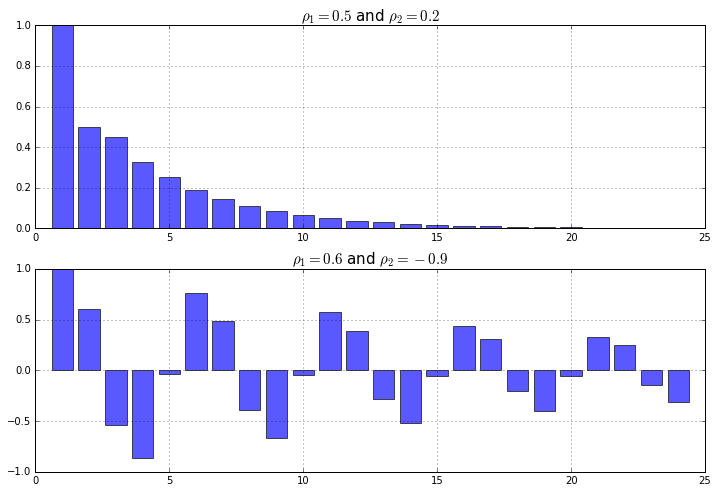

In [11]:
# Create figure that has dimensions 12x8
fig = plt.figure(figsize=(12,8))

# Initial y values
y0 = [0,0]

# End period of simulation
T = 24

# Create w array and set period 1 value
w = np.zeros(T+1)
w[1] = 1

# Specify coefficients
rho = [0.5,0.2]

# Simulate y and remove zeros from the simulated data
df = pth_order_diff(rho,y0,w)

# Remove zeros from the simulated data
df = df.replace(0,np.nan)

# Construct barchart of y values
ax = fig.add_subplot(2,1,1)
ax.bar(df.index,df['y'],alpha = 0.65)
ax.set_title('$\\rho_1 ='+str(rho[0])+'$ and $\\rho_2 = '+str(rho[1])+'$',fontsize=15)
ax.grid()

# Specify coefficients
rho = [0.6,-.9]

# Simulate y
df = pth_order_diff(rho,y0,w)

# Remove zeros from the simulated data
df = df.replace(0,np.nan)

# Construct barchart of y values
ax = fig.add_subplot(2,1,2)
ax.bar(df.index,df['y'],alpha = 0.65)
ax.set_title('$\\rho_1 ='+str(rho[0])+'$ and $\\rho_2 = '+str(rho[1])+'$',fontsize=15)
ax.grid()

Apparently under both parameterizations the second-order difference equation is stable. But change the sign of $\rho_2$ in the last simulation so that the model becomes:

\begin{align}
y_t & = 0.6 y_{t-1} + 0.9 y_{t-2} + w_t,
\end{align}


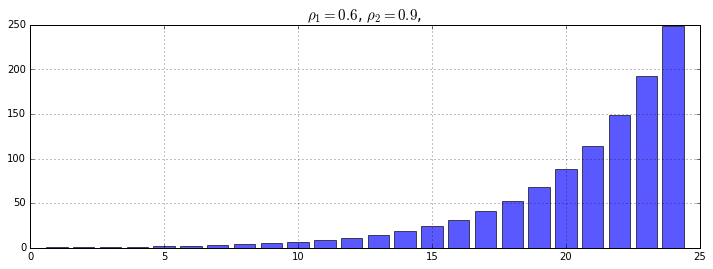

In [12]:
# Create figure that has dimensions 12x4
fig = plt.figure(figsize=(12,4))

# Initial y values
y0 = [0,0]

# End period of simulation
T = 24

# Create w array and set period 1 value
w = np.zeros(T+1)
w[1] = 1

# Specify coefficients
rho = [0.6,0.9]

# Simulate y and remove zeros from the simulated data
df = pth_order_diff(rho,y0,w)

# Remove zeros from the simulated data
df = df.replace(0,np.nan)

# Construct barchart of y values
ax = fig.add_subplot(1,1,1)
ax.bar(df.index,df['y'],alpha = 0.65)
title = ''
for n,r in enumerate(rho):
    title+='$\\rho_'+str(n+1)+' = '+str(round(r,4))+'$, '
ax.set_title(title,fontsize=15)
ax.grid()

Evidently reversing the sign on the second coefficient has caused the model to become explosive. Determining the stability of second-order and higher-order difference equations is not trivial and requires math that is beyond what most students in the course will have seen and I won't go into the topic here. See Chapter 1 of James Hamilton's book [*Time Series Analysis*](https://press.princeton.edu/titles/5386.html]).

However, as the examples suggest, simulating a process can give strong clues about whether a process is stable.

### A Fifth-Order Difference Equation

Now consider the following fifth-order difference equation difference equation:

\begin{align}
y_t & =  -0.3948 y_{t-1} - 0.3719 y_{t-2} - 0.4126 y_{t-3} - 0.3845y_{t-4} +  0.2477 y_{t-5} + w_t
\end{align}

The coefficients were actually chosen randomly using NumPy as you can see in the code below.

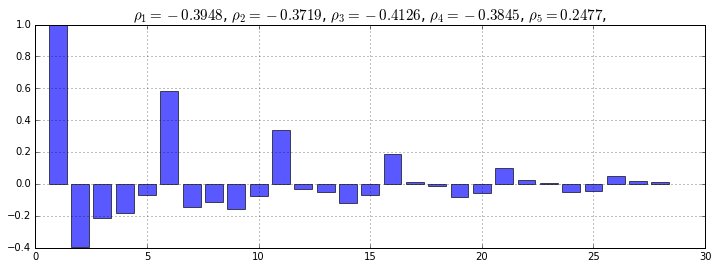

In [13]:
# Create figure that has dimensions 12x4
fig = plt.figure(figsize=(12,4))

# Initial y values
y0 = [0,0,0,0,0]

# End period of simulation
T = 28

# Create w array and set period 1 value
w = np.zeros(T+1)
w[1] = 1

# Specify coefficients
np.random.seed(126)
rho = np.random.uniform(size=5)-0.5
# rho = [0.5,0.2]

# Simulate y and remove zeros from the simulated data
df = pth_order_diff(rho,y0,w)

# Remove zeros from the simulated data
df = df.replace(0,np.nan)

# Construct barchart of y values
ax = fig.add_subplot(1,1,1)
ax.bar(df.index,df['y'],alpha = 0.65)
title = ''
for n,r in enumerate(rho):
    title+='$\\rho_'+str(n+1)+' = '+str(round(r,4))+'$, '
ax.set_title(title,fontsize=15)
ax.grid()